In [8]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt

curr_path = sys.path[0]
util_path = os.path.join(curr_path, '../../utils_project')
if util_path not in sys.path:
    sys.path.append(util_path)
from utils_plot import customize_plt
customize_plt()

In [28]:
def col_rename(x):
    if 'new_' in x:
        x = x.split('new_')[1]
    if '_svo' in x:
        x = x.split('_svo')[0]
    return x

def filter_cols(df):
    run_names = []
    for col in df.columns:
        run_name = col.split(' - ')[0]
        if run_name not in run_names:
            run_names.append(run_name)

    keep_cols = [col+' - val_avg_reward' for col in run_names]
    rename_dict = {col:col_rename(col) for col in keep_cols}
    df = df[keep_cols].rename(columns=rename_dict)
    return df

In [91]:
df20K = filter_cols(pd.read_csv('Nov28-wandb_20_k.csv', index_col=0))
df20E = filter_cols(pd.read_csv('Nov28-wandb_20_E.csv', index_col=0))
df50K = filter_cols(pd.read_csv('Nov28-wandb_50_k.csv', index_col=0))
df50E = filter_cols(pd.read_csv('Nov28-wandb_50_E.csv', index_col=0))
df100K = filter_cols(pd.read_csv('Nov28-wandb_100_k.csv', index_col=0))
df100E = filter_cols(pd.read_csv('Nov28-wandb_100_E.csv', index_col=0))
df20E = df20E.rename(columns={'ref_k0_E': 'k0_rel'})

In [36]:
def draw_train_curve(df, col, epoch=None, ax=None, label="", xlabel=None, **kwargs):
    ax = plt.gca() if ax is None else ax
    ax.plot(df.index, df[col], label=label, **kwargs)
    if xlabel is not None:
        ax.set_xlabel(xlabel)

In [102]:

def draw_20_k(df20K, ax):
    colors = ['seagreen', 'royalblue', 'darkviolet']
    draw_train_curve(df20K, 'k3_rel', label='k=3 (rel)', ax=ax, color=colors[0])
    draw_train_curve(df20K, 'k3_org', label='k=3 (org)', ax=ax, color=colors[0], ls='dotted')
    draw_train_curve(df20K, 'k10_rel', label='k=10 (rel)', ax=ax, color=colors[1])
    draw_train_curve(df20K, 'k10_org', label='k=10 (org)', ax=ax, color=colors[1], ls='dotted')
    draw_train_curve(df20K, 'k20_rel', label='k=20 (rel)', ax=ax, color=colors[2])
    draw_train_curve(df20K, 'k20_org', label='k=20 (org)', ax=ax, color=colors[2], ls='dotted')
    draw_train_curve(df20K, 'k20_org_onlyD', label=r'k=20 (only $\Gamma$)', ax=ax, color='firebrick')
    draw_train_curve(df20K, 'ref_k0_E', label='baseline', ax=ax, color='grey')
    ax.legend(loc='upper right', ncols=2, fontsize=12)

def draw_E(dfE, ax):
    colors = ['orangered', 'seagreen']
    draw_train_curve(dfE, 'E_rel', label='rel edge', ax=ax, color=colors[0])
    draw_train_curve(dfE, 'E_org', label='org edge', ax=ax, color=colors[0], ls='dotted')
    draw_train_curve(dfE, 'E_rel_k5_rel', label='Edge (r) + k=5 (r)', ax=ax, color=colors[1])
    draw_train_curve(dfE, 'E_org_k5_rel', label='Edge (o) + k=5 (r)', ax=ax, color=colors[1], ls="dotted")
    draw_train_curve(dfE, 'k0_rel', label='baseline', ax=ax, color='grey')
    ax.legend(loc='upper right', ncols=1)

def draw_50_k(df50K, ax):
    colors = ['seagreen', 'royalblue', 'darkviolet']
    draw_train_curve(df50K, 'k5_rel_fast', label='k=5 (rel)', ax=ax, color=colors[0])
    draw_train_curve(df50K, 'k5_org', label='k=5 (org)', ax=ax, color=colors[0], ls='dotted')
    draw_train_curve(df50K, 'k10_rel', label='k=10 (rel)', ax=ax, color=colors[1])
    draw_train_curve(df50K, 'k10_org', label='k=10 (org)', ax=ax, color=colors[1], ls='dotted')
    draw_train_curve(df50K, 'k0_rel', label='baseline', ax=ax, color='grey')
    ax.legend(loc='upper right', ncols=1)

def draw_100_k(df100K, ax):
    colors = ['seagreen', 'royalblue', 'darkviolet']
    draw_train_curve(df100K, 'k5_rel_fast', label='k=5 (rel)', ax=ax, color=colors[0])
    draw_train_curve(df100K, 'k5_org', label='k=5 (org)', ax=ax, color=colors[0], ls='dotted')
    draw_train_curve(df100K, 'k20_rel', label='k=20 (rel)', ax=ax, color=colors[2])
    draw_train_curve(df100K, 'k20_org', label='k=20 (org)', ax=ax, color=colors[2], ls='dotted')
    draw_train_curve(df100K, 'k0_rel', label='baseline', ax=ax, color='grey')

    ax.legend(loc='upper right', ncols=1)
    # ax.set_ylim(9.32, 10.2)



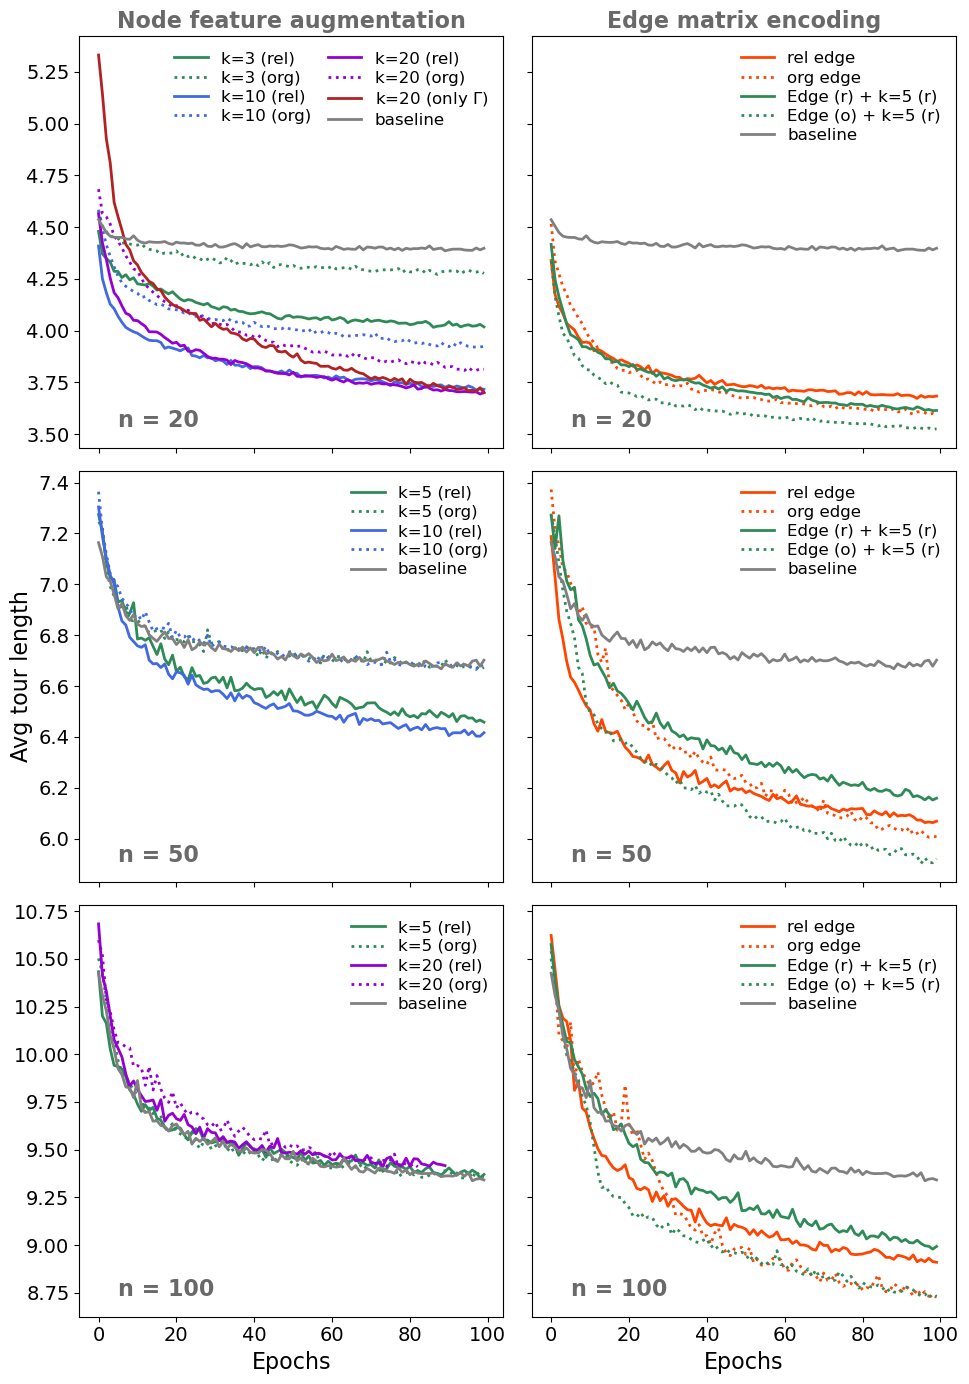

In [106]:
fig, axs = plt.subplots(3, 2, figsize=(10,14), sharex=True, sharey='row')

draw_20_k(df20K, axs[0,0])
draw_50_k(df50K, axs[1,0])
draw_100_k(df100K, axs[2,0])

draw_E(df20E, axs[0,1])
draw_E(df50E, axs[1,1])
draw_E(df100E, axs[2,1])

for i in range(2):
    axs[2,i].set_xlabel('Epochs')
axs[1,0].set_ylabel('Avg tour length')

for i in range(6):
    ax = axs[i//2, i%2]
    ylim = ax.get_ylim()
    text_y = ylim[0] + (ylim[1]-ylim[0])*0.05
    n = 20 * (i//2 == 0) + 50 * (i//2 == 1) + 100 * (i//2 == 2)
    ax.text(5, text_y, f'n = {n}', color='dimgrey', fontsize=16, weight='bold')

axs[0,0].set_title('Node feature augmentation', weight='bold', color='dimgrey')
axs[0,1].set_title('Edge matrix encoding', weight='bold', color='dimgrey')

plt.tight_layout()
plt.savefig('../figures/training_curves_standard.png', bbox_inches='tight', facecolor='white', dpi=300)